<a href="https://colab.research.google.com/github/guilhermelaviola/GoalAnalysis/blob/main/LautaroInterGoals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [2]:
# Importing and displaying the last 10 goals scored:
goals_scored = pd.ExcelFile('goals-scored.xlsx')
toro = pd.read_excel(goals_scored, 'lautaro')
toro.tail(10)

,Competition,Round,Date,H/A,Against,Score,Position,Minute,Which goal,Type of goal,Assist
118,Serie A TIM,16,2023-12-17,A,Lazio,0–1,CF,40,0–1,Left-footed shot,NaN
119,Serie A TIM,19,2024-01-06,H,Hellas Verona,2–1,CF,13,1–0,Right-footed shot,Henrikh Mkhitaryan
120,Serie A TIM,20,2024-01-13,A,Monza,1–5,CF,14,0–2,Right-footed shot,Federico Dimarco
121,Serie A TIM,20,2024-01-13,A,Monza,1–5,CF,84,1–4,Penalty,NaN
122,Supercoppa Italiana,Final,2024-01-22,A,Napoli,0–1,CF,91,0–1,Right-footed shot,Benjamin Pavard
123,Serie A TIM,22,2024-01-28,A,Fiorentina,0–1,CF,14,0–1,Header,Kristjan Asllani
124,Serie A TIM,25,2024-02-16,H,Salernitana,4–0,SS,19,2–0,Right-footed shot,Carlos Augusto
125,Serie A TIM,26,2024-02-25,A,Lecce,0–4,CF,15,0–1,Counter attack goal,Kristjan Asllani
126,Serie A TIM,26,2024-02-25,A,Lecce,0–4,CF,56,0–3,Left-footed shot,Davide Frattesi
127,Serie A TIM,21,2024-02-28,H,Atalanta,4–0,SS,45+1,2–0,Left-footed shot,Benjamin Pavard


I extracted this data from Transfermarkt.

In [3]:
# Displaying the number of rows and columns in the dataset:
toro.shape

(128, 11)

In [4]:
# Displaying the datatypes of each column:
toro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Competition   128 non-null    object        
 1   Round         128 non-null    object        
 2   Date          128 non-null    datetime64[ns]
 3   H/A           128 non-null    object        
 4   Against       128 non-null    object        
 5   Score         128 non-null    object        
 6   Position      128 non-null    object        
 7   Minute        128 non-null    object        
 8   Which goal    128 non-null    object        
 9   Type of goal  128 non-null    object        
 10  Assist        95 non-null     object        
dtypes: datetime64[ns](1), object(10)
memory usage: 11.1+ KB


As you can see above, the dataset has 118 rows at moment (03/01/2024). Each row represents a goal Lautaro scored for Inter. And there are 11 columns:
1. Competition
2. Round
3. Date
4. H/A - Home or Away
5. Against
6. Final Score
7. Position
8. Minute
9. Which goal
10. Type of goal
11. Assist



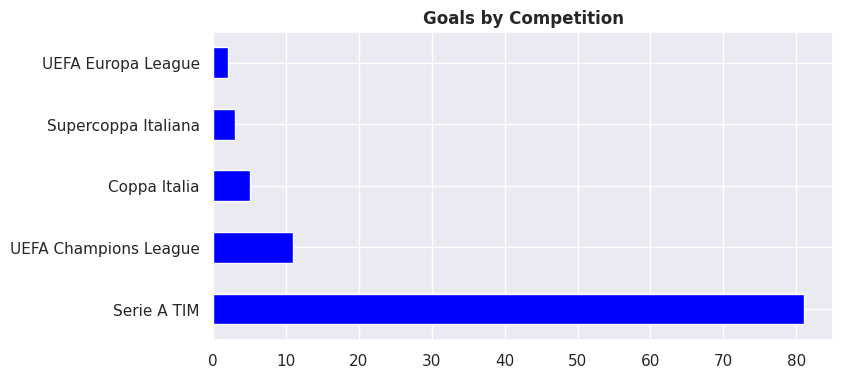

In [7]:
# Displaying goals scored by competition:
toro.groupby('Date').first()['Competition'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Goals by Competition', fontweight = 'bold')
plt.show()

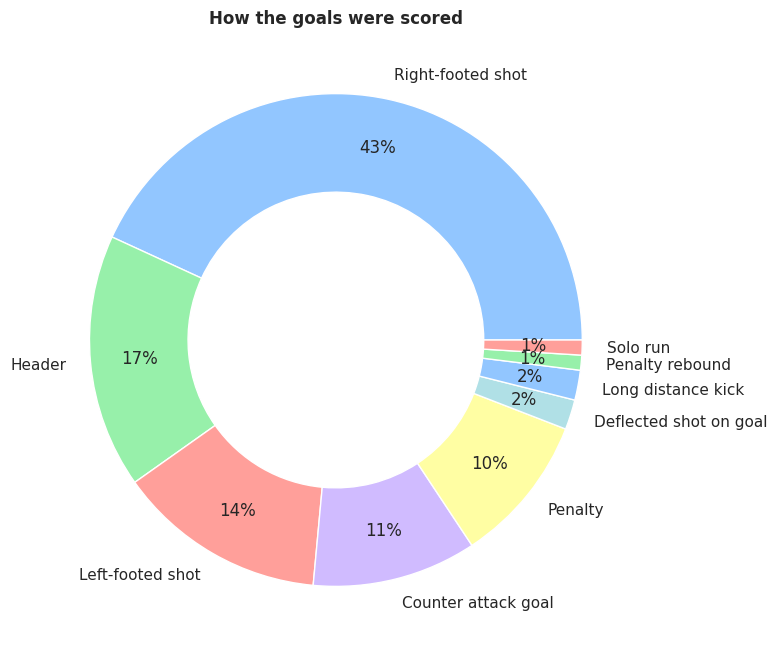

In [15]:
# Displaying goals scored by the way it was scored:
toro.groupby('Date').first()['Type of goal'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('How the goals were scored', fontweight = 'bold')
plt.show()

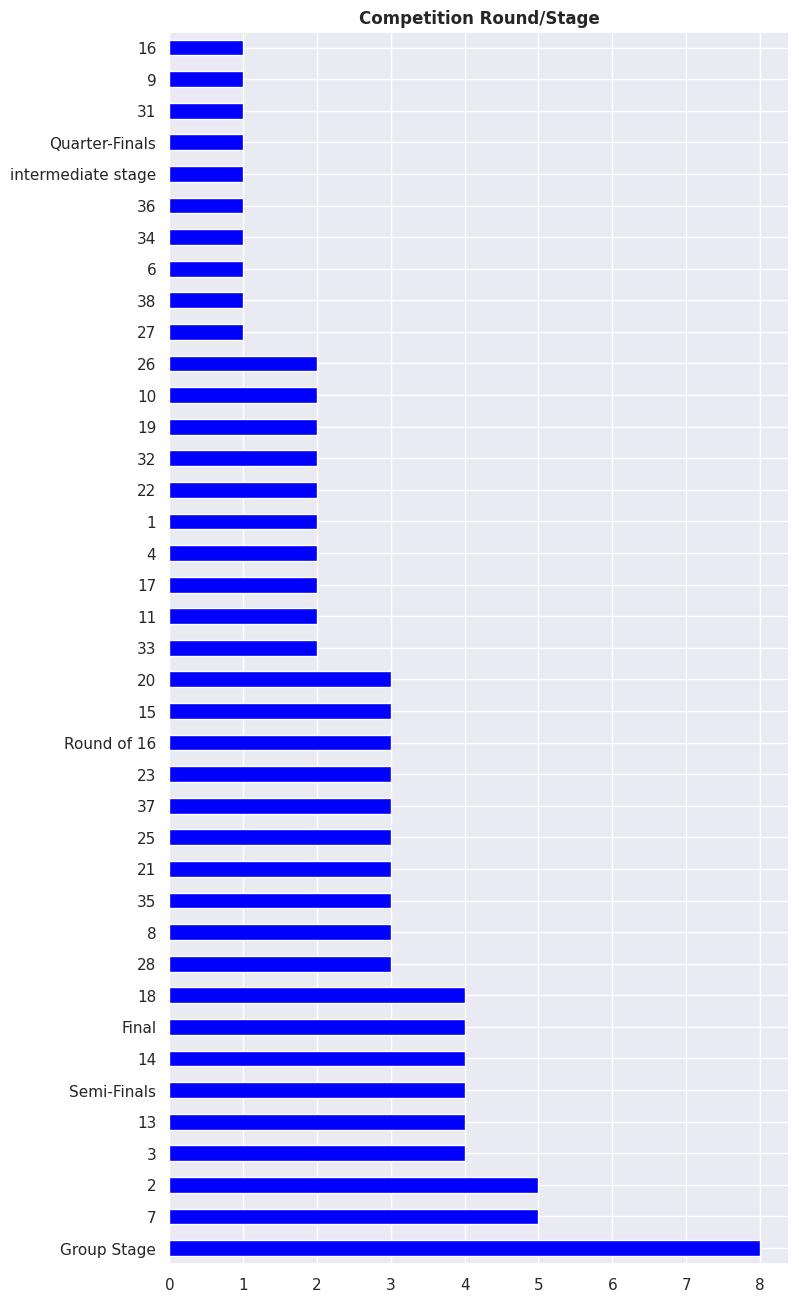

In [16]:
# Displaying the competition's round/stage the goals were scored:
toro.groupby('Date').first()['Round'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 16))
plt.ylabel(None)
plt.title('Competition Round/Stage', fontweight = 'bold')
plt.show()


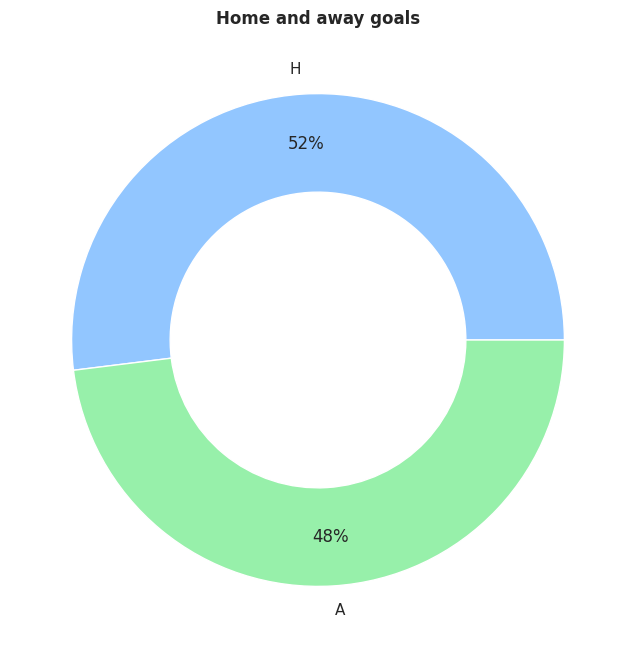

In [17]:
# Displaying goals scored by where it was scored (H or A):
toro.groupby('Date').first()['H/A'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Home and away goals', fontweight = 'bold')
plt.show()

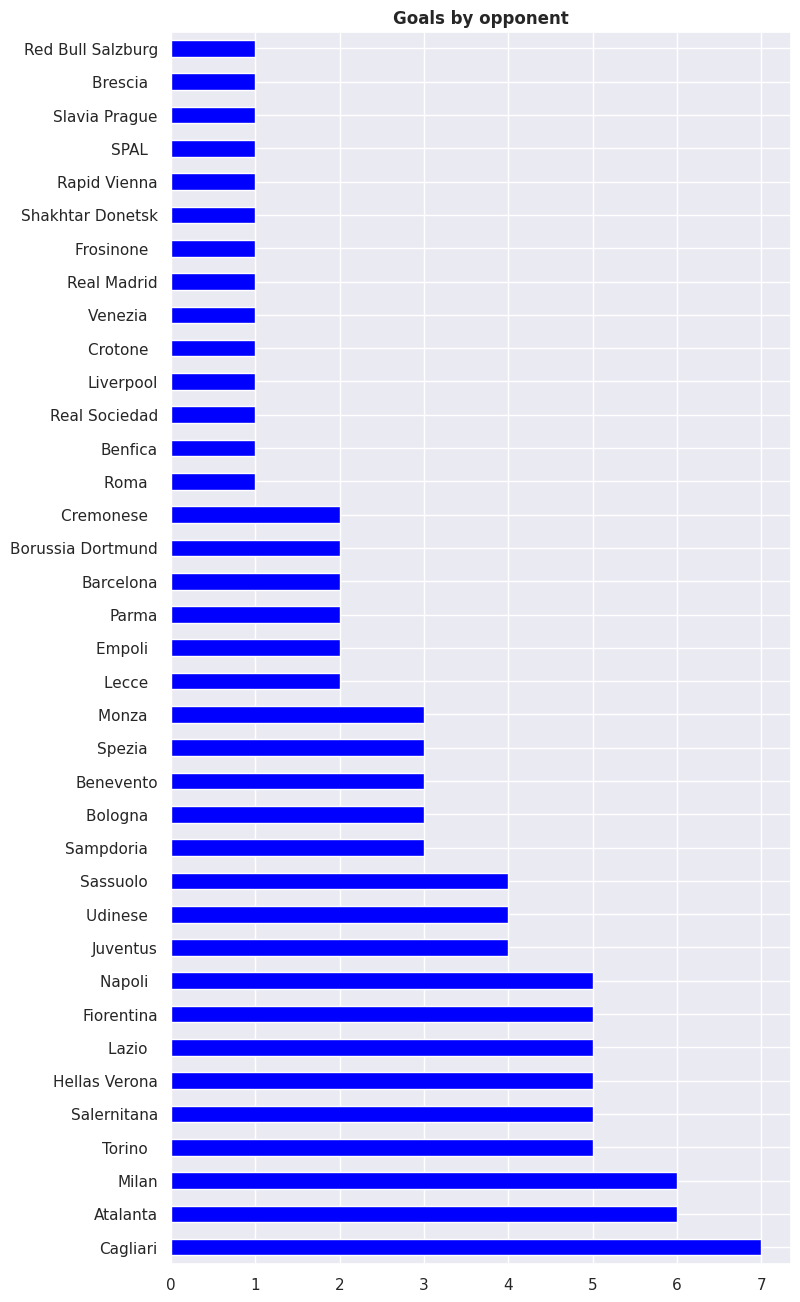

In [19]:
# Displaying goals scored by opponent:
toro.groupby('Date').first()['Against'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 16))
plt.ylabel(None)
plt.title('Goals by opponent', fontweight = 'bold')
plt.show()

In [20]:
# Generating columns for day, month and year the goals were scored:
toro['Date'] = toro['Date'].map(pd.to_datetime)
toro['Day'] = toro['Date'].apply(lambda x : x.day)
toro['Month'] = toro['Date'].apply(lambda x : x.month)
toro['Year'] = toro['Date'].apply(lambda x : x.year)

print(toro.head())

    Competition        Round       Date H/A      Against Score Position  \
0   Serie A TIM            7 2018-09-29   H     Cagliari   2–0       CF   
1   Serie A TIM           13 2018-11-24   H  Frosinone     3–0       CF   
2   Serie A TIM           18 2018-12-26   H     Napoli     1–0       CF   
3  Coppa Italia  Round of 16 2019-01-13   H    Benevento   6–2       SS   
4  Coppa Italia  Round of 16 2019-01-13   H    Benevento   6–2       SS   

  Minute Which goal       Type of goal        Assist  Day  Month  Year  
0     12        1–0             Header       Dalbert   29      9  2018  
1     57        2–0             Header   Keita Baldé   24     11  2018  
2   90+1        1–0   Left-footed shot           NaN   26     12  2018  
3     48        4–0             Header  Ivan Perisic   13      1  2019  
4     66        5–1  Right-footed shot  Ivan Perisic   13      1  2019  


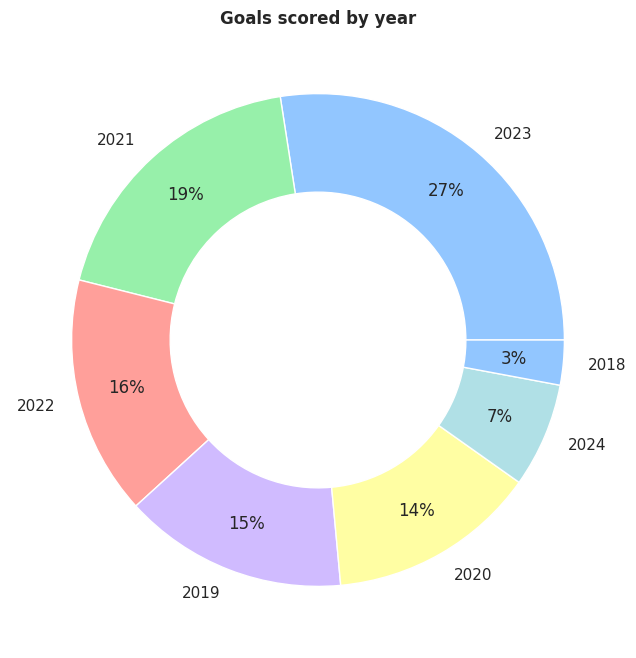

In [22]:
# Displaying goals scored by year:
toro.groupby('Date').first()['Year'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Goals scored by year', fontweight = 'bold')
plt.show()

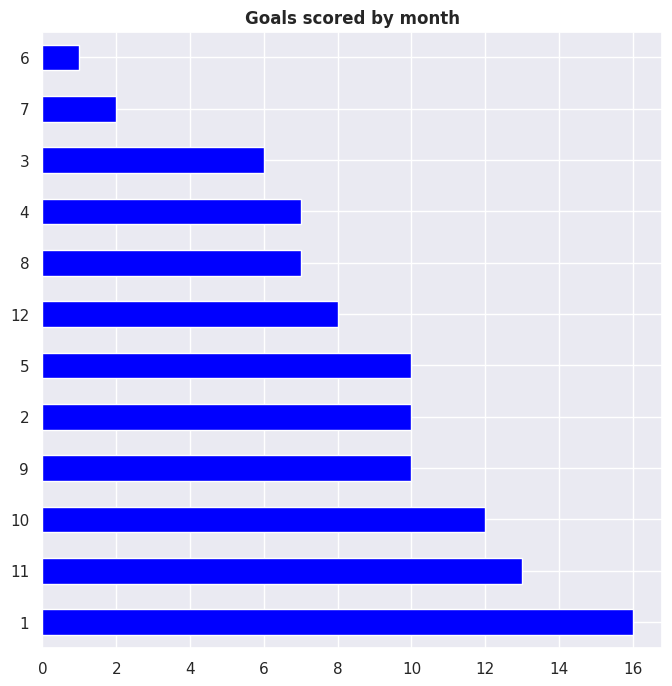

In [24]:
# Displaying goals scored by month:
toro.groupby('Date').first()['Month'].value_counts().plot(kind = 'barh', color = 'blue',figsize = (8, 8))
plt.ylabel(None)
plt.title('Goals scored by month', fontweight = 'bold')
plt.show()

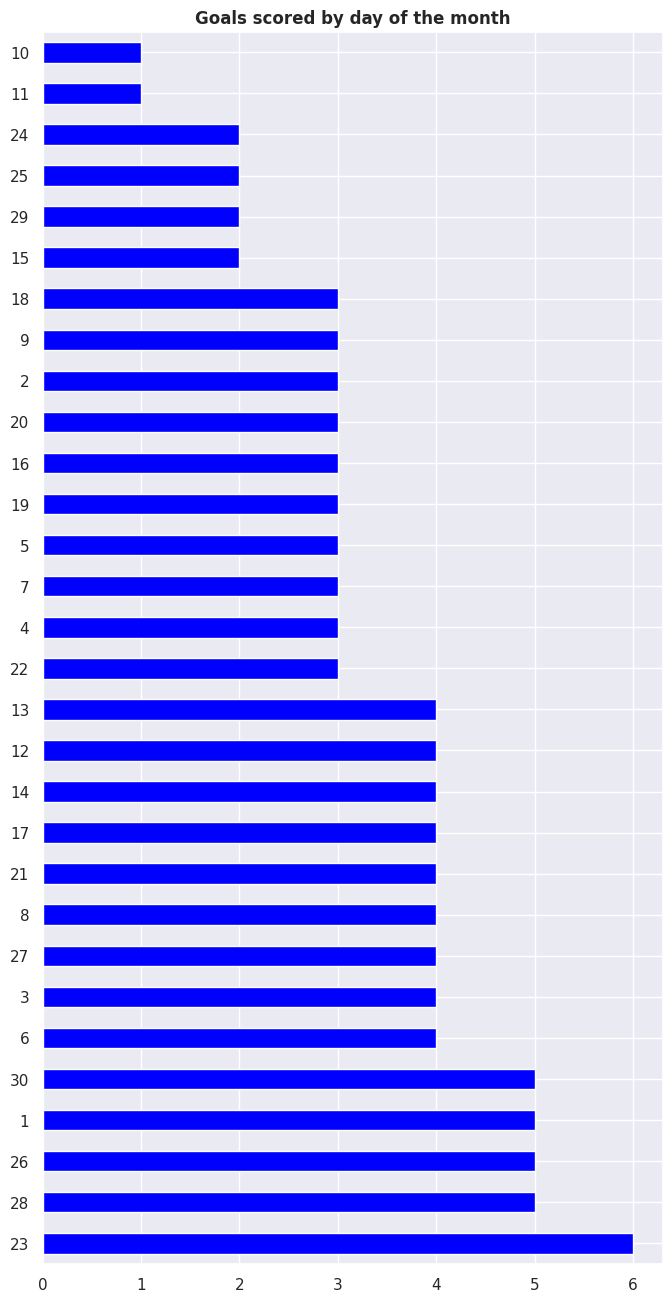

In [25]:
# Displaying goals scored by day of the month:
toro.groupby('Date').first()['Day'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 16))
plt.ylabel(None)
plt.title('Goals scored by day of the month', fontweight = 'bold')
plt.show()

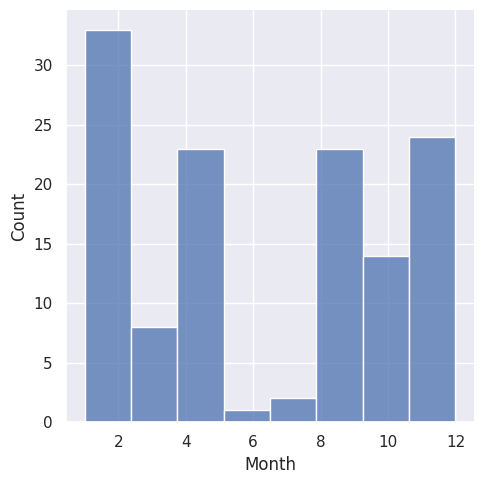

In [26]:
# Checking the goal performances by month:
sns.set(rc = {'figure.figsize' : (12, 10)})
sns.displot(toro['Month'])

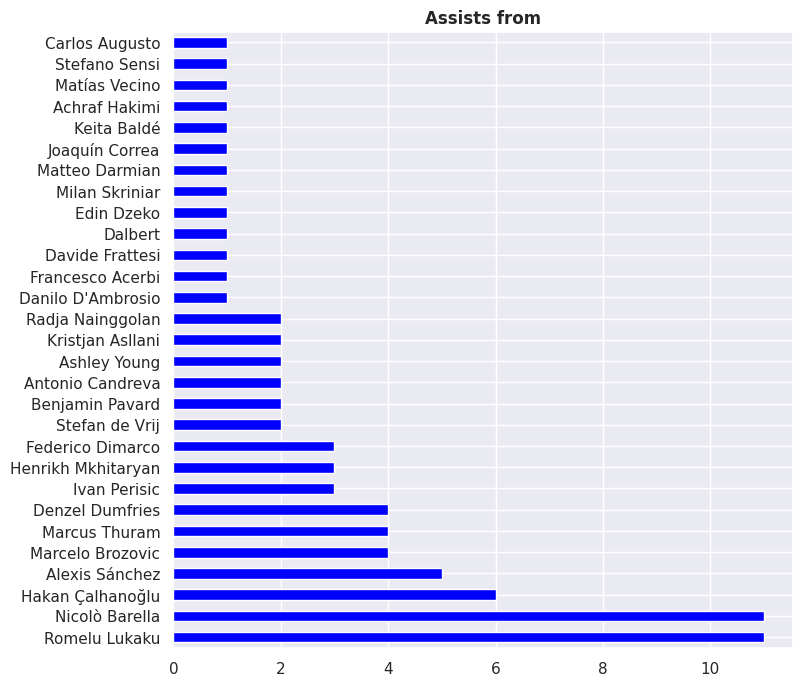

In [28]:
# Displaying who the assists came from
toro.groupby('Date').first()['Assist'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 8))
plt.ylabel(None)
plt.title('Assists from', fontweight = 'bold')
plt.show()

<Axes: xlabel='Month', ylabel='Year'>

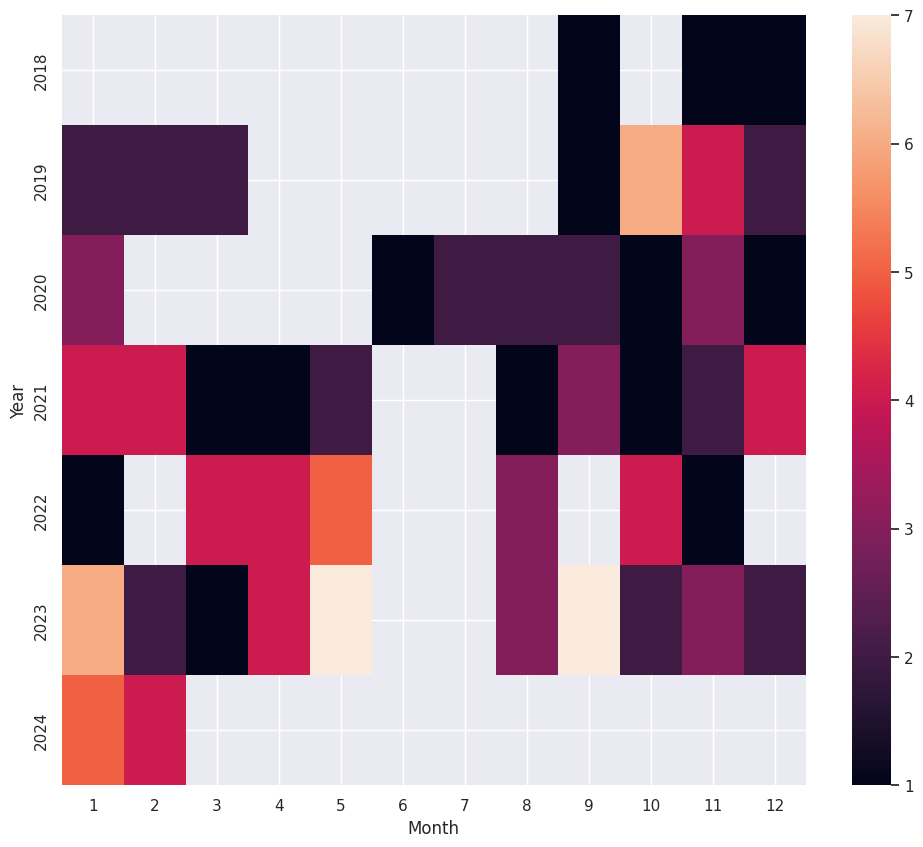

In [30]:
# Correlation of Year and Month performances with heatmap:
corr = toro.groupby(['Year', 'Month']).apply(lambda x : len(x))
corr = corr.unstack()
sns.heatmap(corr, annot = False)

In [ ]:
def scored_in_first_or_second_half(timing):
  if timing < 45:
    result = 'First half'
  elif timing > 45 and timing < 90:
    result = 'Second half'
  else:
    result = 'Extra time'
  return result

df['First or Second Half'] = df['Minute'].apply(scored_in_first_or_second_half)
df.head(10)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
def result_type(location, score_h, score_a):
  if location == 'H' and score_h > score_a:
    result = 'Home win'
  elif location == 'H' and score_h < score_a:
    result = 'Home defeat'
  elif location == 'H' and score_h == score_a:
    result = 'Home draw'
  elif location == 'A' and score_a > score_h:
    result = 'Away win'
  elif location == 'A' and score_a < score_h:
    result = 'Away defeat'
  else:
    result = 'Away draw'
  return result

df['Result type'] = df[['Home or away', 'Score H', 'Score A']].apply(result_type)
df.head(10)

TypeError: ignored

In [ ]:
# Testing the method
def result_type(score_h, score_a):
  if score_h > score_a:
    result = 'Home win'
  elif score_h < score_a:
    result = 'Home defeat'
  elif score_h == score_a:
    result = 'Home draw'
  elif score_a > score_h:
    result = 'Away win'
  elif score_a < score_h:
    result = 'Away defeat'
  elif score_a == score_h:
    result = 'Away draw'
  return result

df['Result type'] = df[['Score H', 'Score A']].apply(result_type)
df.head(10)

TypeError: ignored

In [ ]:
df.groupby('Minute').first()['First or Second Half'].value_counts().plot(kind = 'pie',
                                                              autopct = '%.0f%%',
                                                              figsize = (8, 8),
                                                              wedgeprops = dict(width = 0.4),
                                                              pctdistance = 0.8)
plt.ylabel(None)
plt.title('Breakdown of goals by half', fontweight = 'bold')
plt.show()

KeyError: ignored

In [ ]:
# Adding Racing Bar animation for :
df.Date = pd.to_datetime(df.Date, format = '%Y')

In [ ]:
#Preparing a pivot table:
racing_bar_data = df.pivot_table(values = 'Against who', index = 'Date', columns = 'Competition')

<ipython-input-12-796136b4e6b4>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  racing_bar_data = df.pivot_table(values = 'Against who', index = 'Date', columns = 'Competition')


In [ ]:
# Checking if there are any null value in the pivot table:
racing_bar_data.columns[racing_bar_data.isnull().sum() == 0]

Index([], dtype='object', name='Competition')

In [ ]:
# Converting the data into a cumulative sum over several years:
racing_bar_filled = racing_bar_data.interpolate(method = 'linear').fillna(method = 'bfill')
racing_bar_filled = racing_bar_filled.cumsum()

In [ ]:
# Oversampling the dataset with interpolation (linear) for a smooth transition in the frames of the snimation:
racing_bar_filled = racing_bar_filled.resample('1D').interpolate(method = 'linear')[::7]

ValueError: ignored

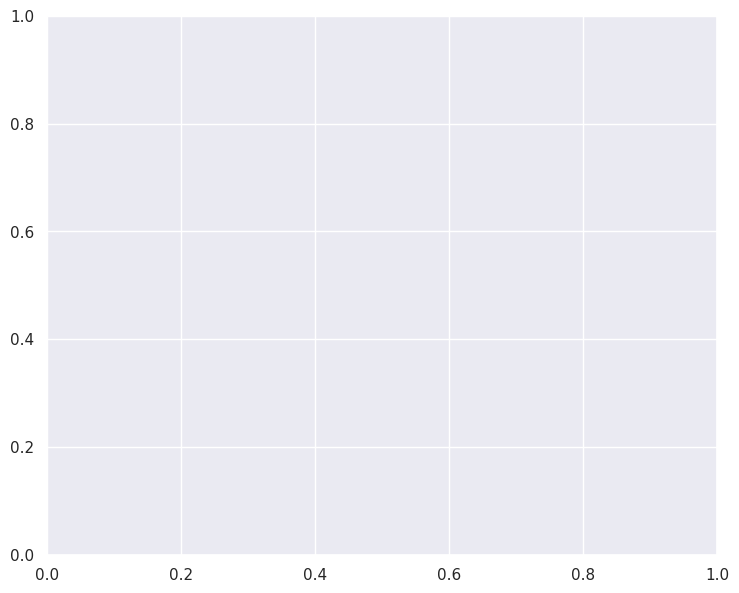

In [ ]:
# Creating and saving a Bar Chart Animation:
selected = racing_bar_filled.iloc[-1, :].sort_values(ascending = False)[:20].index
data = racing_bar_filled[selected].round()

fig, ax = plt.subplots(figsize = (9.3, 7))
fig.subplots_adjust(left = 0.18)

#Number of frames:
no_of_frames = data.shape[0]

# Initiating the barplot with the first rows of the dataframe:
bars = sns.barplot(y = data.columns, x = data.iloc[0, :], orient = 'h', ax = ax)
ax.set_xlim(0, 1500)
texts = [ax.text(0, i, 0, va = 'center') for i in range(data.shape[1])]
title_text = ax.text(650, -1, 'Date: ', fontsize = 12)
ax.set_xlabel(' ')
ax.set_ylabel(None)

def animate(i):
  y = data.iloc[i, :]

  # Updating the title of the barplot axis:
  title_text.set_text(f'Date: {str(data.index[i].date())}')

  # updating elements in both plots:
  for j, b, in enumerate(bars.patches):
    # updating each bar's height:
    b.set_width(y[j])

    # updating text for each bar (optional)
    texts[j].set_text(f'${y[j].astype(int)}M')
    texts[j].set_x(y[j])

animation = FuncAnimation(fig, animate, repeat = False,
                          frames = no_of_frames,
                          interval = 1, blit = False)
animation.save('goals.gif', writer = 'imagemagick', fps = 120)
plt.close(fig)